## Amazon Textract

**Amazon Textract란?**
* 서류 등을 촬영한 JPEG형식 또는 PNG 형식의 이미지에서 텍스트 등의 데이터를 추출하는 서비스입니다. 
* 단순히 문자를 인식할 뿐만 아니라
* 정형 서류 폼에서 필드를 인식하고 거기에 기재된 값이나 테이블(표 구성)을 인식해 그 값을 추출할 수 있습니다. 
* 촬영된 이미지는 Base64형식의 인코딩 과정을 통해 Textract API의 파라미터로 전달해야 하고,
* S3 버킷에 파일로 저장되며,
* JSON 형식으로 리턴값을 보내줍니다. 

** 지원언어: 영어, 스페인어, 독일어, 이탈리아어, 프랑스어 및 포르투갈어를 지원(한국어X)

**권한 추가**
* AmazonS3FullAccess
* AmazonTextractFullAccess


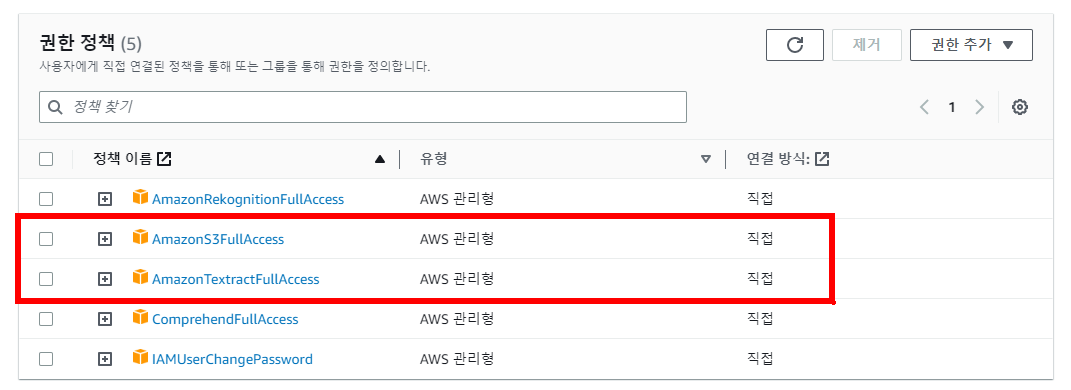

### 1.Detect text from local image


https://docs.aws.amazon.com/textract/latest/dg/API_DetectDocumentText.html


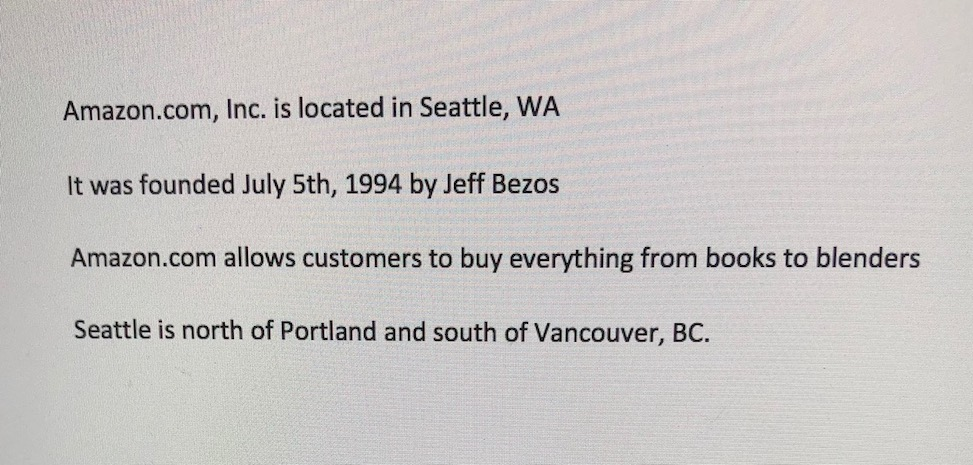

In [1]:
from PIL import Image

documentName = "simple-document-image.jpg"
img = Image.open(documentName)
img


In [2]:
# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

In [3]:
import boto3
textract = boto3.client('textract',region_name='ap-northeast-2')

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': 'f16fea3b-b8c9-45d3-b887-9f042666771a',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['bb5345a8-f601-4e9a-a6fe-e1028b9c4cde',
      '32026611-1345-41f5-817c-77c63be91f1d',
      '2b519bfb-a6ed-4da0-80d3-627b53a55f6c',
      '08603ab0-1ac9-4c1a-bc6b-23b5d334ac32']}]},
  {'BlockType': 'LINE',
   'Confidence': 99.52398681640625,
   'Text': 'Amazon.com, Inc. is located in Seattle, WA',
   'Geometry': {'BoundingBox': {'Width': 0.512660026550293,
     'Height': 0.06824082136154175,
     'Left': 0.06333211064338684,
     'Top': 0.1989629715681076},
    'Polygon': [{'X': 0.06337157636880875, 'Y': 0.20793944597244263},
     {'X': 0.5759921669960022, 'Y': 0.1989629715681076},
     {'X': 0.57596

In [6]:
# 텍스트 추출하기

for i in response['Blocks']:
    if i['BlockType'] =='LINE' :
        print(i['Text'])

Amazon.com, Inc. is located in Seattle, WA
It was founded July 5th, 1994 by Jeff Bezos
Amazon.com allows customers to buy everything from books to blenders
Seattle is north of Portland and south of Vancouver, BC.


### 2.Detect text from S3 object

* 이미지를 S3 버킷에 업로드 후에 코드를 실행시킵니다. 

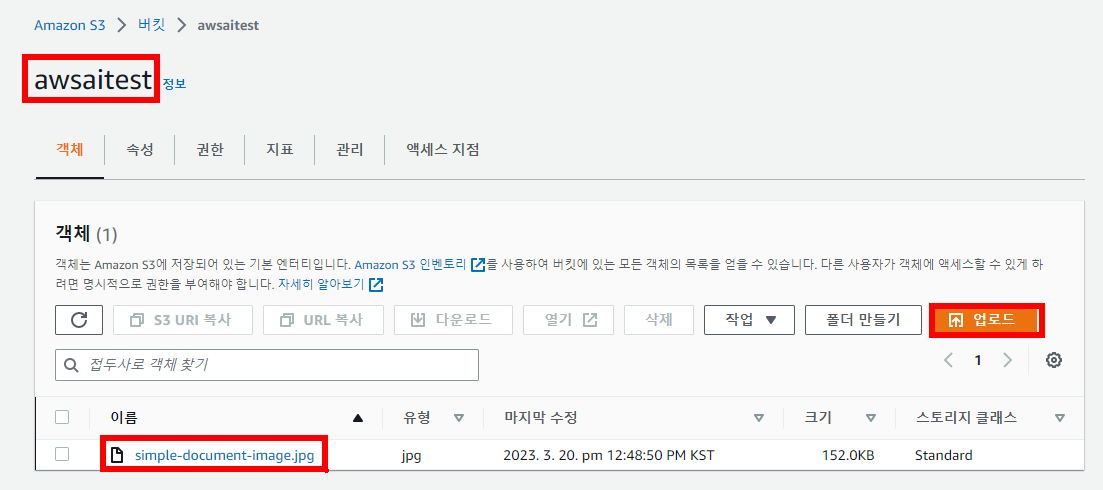

In [1]:
s3BucketName = 'sesac05' # 버킷이름
documentName = "simple-document-image.jpg" # 파일이름

# Call Amazon Textract
import boto3
textract = boto3.client('textract',region_name='ap-northeast-2')
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 0.0},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': 'd2a23bf9-f754-4472-990f-715bfa586d57',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['998d24d6-e52d-47e3-8054-3225be78cff9',
      '8f4ce562-9b28-491e-9ab9-438d628d0001',
      '58b50594-7ad7-4393-80fd-266dd6e650f3',
      'c2dc15a9-c712-490b-88a8-2a7f0e3ea4db']}]},
  {'BlockType': 'LINE',
   'Confidence': 99.52398681640625,
   'Text': 'Amazon.com, Inc. is located in Seattle, WA',
   'Geometry': {'BoundingBox': {'Width': 0.512660026550293,
     'Height': 0.06824082136154175,
     'Left': 0.06333211064338684,
     'Top': 0.1989629715681076},
    'Polygon': [{'X': 0.06337157636880875, 'Y': 0.20793944597244263},
     {'X': 0.5759921669960022, 'Y': 0.1989629715681076},
     {'X': 0.57596

In [6]:
# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

Amazon.com, Inc. is located in Seattle, WA
It was founded July 5th, 1994 by Jeff Bezos
Amazon.com allows customers to buy everything from books to blenders
Seattle is north of Portland and south of Vancouver, BC.


### 3.텍스트 분석

이미지로된 텍스트의 내용을 분석하기
1. 이미지-> 텍스트로
2. 텍스트 감성 분석
3. 텍스트 엔티티 추출

In [1]:
#연결 확인
import boto3

client = boto3.client('s3',region_name='ap-northeast-2')
client.list_buckets()

{'ResponseMetadata': {'RequestId': 'CGR43JG15D7VD0YP',
  'HostId': 'oUlWF0B2yA69EK/A3kkc60w2bi/wu+SAf/7XMLrdstLdU7xXXYu+9Ln2Xju5/MLcZi/vBYeETTE=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'oUlWF0B2yA69EK/A3kkc60w2bi/wu+SAf/7XMLrdstLdU7xXXYu+9Ln2Xju5/MLcZi/vBYeETTE=',
   'x-amz-request-id': 'CGR43JG15D7VD0YP',
   'date': 'Tue, 04 Apr 2023 00:58:13 GMT',
   'content-type': 'application/xml',
   'transfer-encoding': 'chunked',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'aws-12012',
   'CreationDate': datetime.datetime(2023, 4, 4, 0, 54, 45, tzinfo=tzutc())},
  {'Name': 'aws-stu11',
   'CreationDate': datetime.datetime(2023, 4, 3, 8, 33, 31, tzinfo=tzutc())},
  {'Name': 'aws.ai.bucket17',
   'CreationDate': datetime.datetime(2023, 4, 4, 0, 49, 57, tzinfo=tzutc())},
  {'Name': 'aws.ai.sesac.bucket',
   'CreationDate': datetime.datetime(2023, 4, 3, 8, 33, 1, tzinfo=tzutc())},
  {'Name': 'aws.ai.sesac.expert.callsign.mvrick',
   'CreationDate': date

In [2]:
s3BucketName = 'sesac05' # 버킷이름
documentName = "simple-document-image.jpg" # 파일이름

# Call Amazon Textract
import boto3
textract = boto3.client('textract',region_name='ap-northeast-2')
response = textract.detect_document_text(
    Document={
        'S3Object': {
            'Bucket': s3BucketName,
            'Name': documentName
        }
    })

In [14]:
print('Text')
print('='*8)
text = ''
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print ('\033[34m' + item["Text"] + '\033[0m')
        text += item["Text"] + ' '
        
comprehend = boto3.client('comprehend', region_name='ap-northeast-2')
response_text = comprehend.detect_sentiment(Text = text, LanguageCode='en')
print()
print('Sentiment')
print('='*8)
print(response_text['Sentiment'] + '\n')


response_ent = comprehend.detect_entities(Text=text, LanguageCode='en')
print('Entities')
print('='*8)
for i in response_ent['Entities'] :
    print(i['Type'] + '\t=>\t' + i['Text'])


Text
Amazon.com, Inc. is located in Seattle, WA
It was founded July 5th, 1994 by Jeff Bezos
Amazon.com allows customers to buy everything from books to blenders
Seattle is north of Portland and south of Vancouver, BC.

Sentiment
NEUTRAL

Entities
ORGANIZATION	=>	Amazon.com, Inc.
LOCATION	=>	Seattle, WA
DATE	=>	July 5th, 1994
PERSON	=>	Jeff Bezos
ORGANIZATION	=>	Amazon.com
LOCATION	=>	Seattle
LOCATION	=>	Portland
LOCATION	=>	Vancouver, BC


In [16]:
response_ent

{'Entities': [{'Score': 0.9914734363555908,
   'Type': 'ORGANIZATION',
   'Text': 'Amazon.com, Inc.',
   'BeginOffset': 0,
   'EndOffset': 16},
  {'Score': 0.9884433746337891,
   'Type': 'LOCATION',
   'Text': 'Seattle, WA',
   'BeginOffset': 31,
   'EndOffset': 42},
  {'Score': 0.999391496181488,
   'Type': 'DATE',
   'Text': 'July 5th, 1994',
   'BeginOffset': 58,
   'EndOffset': 72},
  {'Score': 0.9988908767700195,
   'Type': 'PERSON',
   'Text': 'Jeff Bezos',
   'BeginOffset': 76,
   'EndOffset': 86},
  {'Score': 0.8992172479629517,
   'Type': 'ORGANIZATION',
   'Text': 'Amazon.com',
   'BeginOffset': 87,
   'EndOffset': 97},
  {'Score': 0.9961607456207275,
   'Type': 'LOCATION',
   'Text': 'Seattle',
   'BeginOffset': 156,
   'EndOffset': 163},
  {'Score': 0.9148939847946167,
   'Type': 'LOCATION',
   'Text': 'Portland',
   'BeginOffset': 176,
   'EndOffset': 184},
  {'Score': 0.9093390107154846,
   'Type': 'LOCATION',
   'Text': 'Vancouver, BC',
   'BeginOffset': 198,
   'EndOffs

### 4.폼/테이블에서 문자 추출

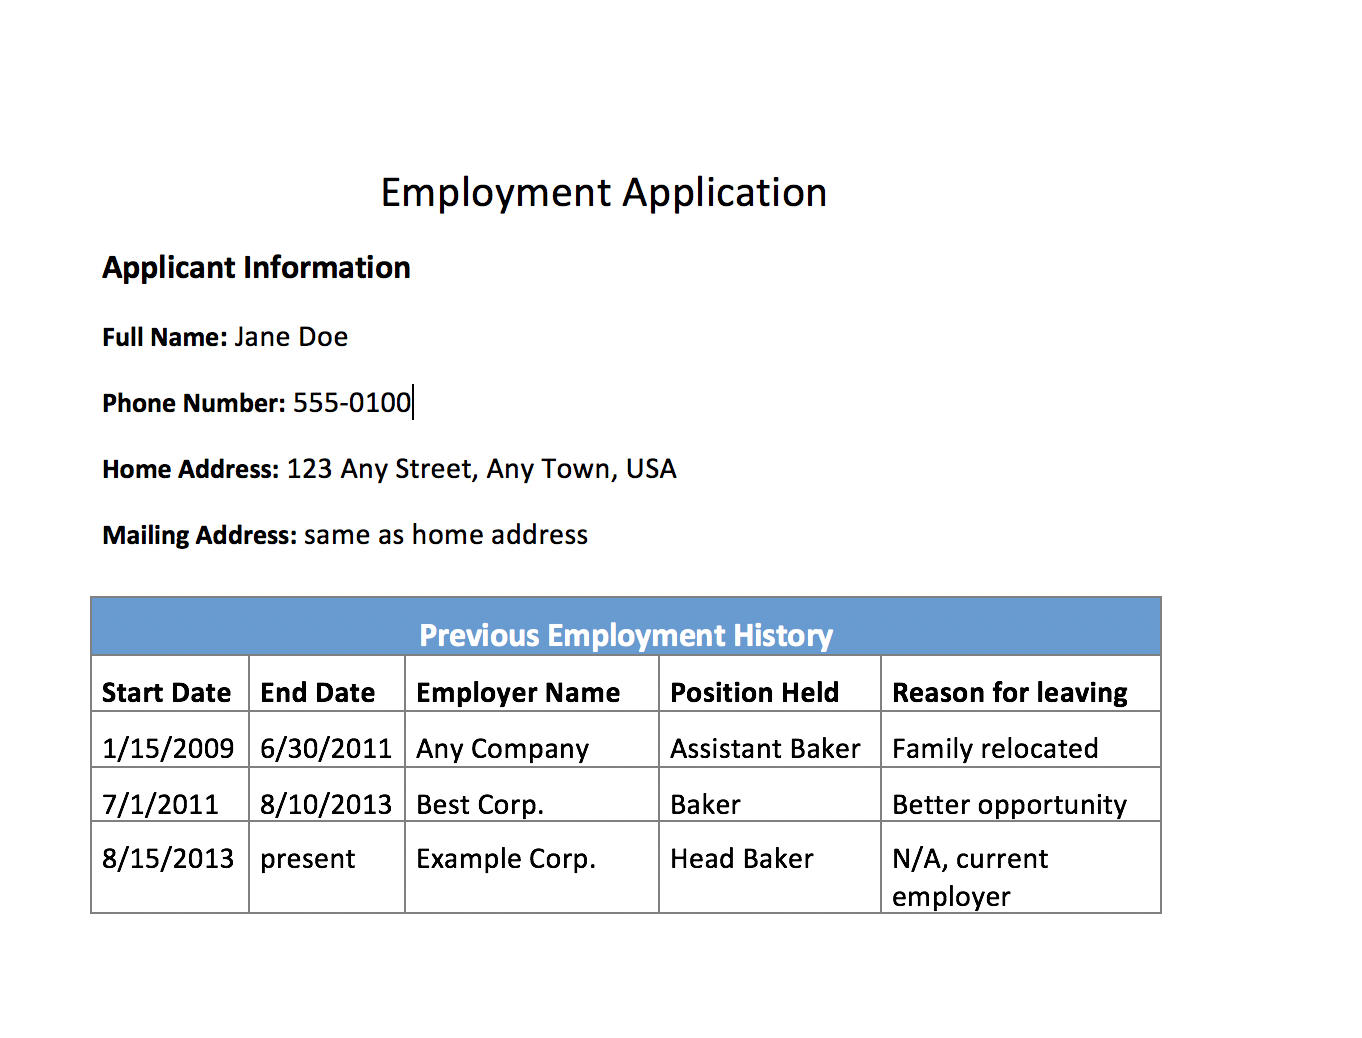

In [17]:
from PIL import Image

documentName = "employmentapp.png"
Image.open(documentName)

In [18]:
import boto3

# Document
documentName = "employmentapp.png"

# Amazon Textract client
textract = boto3.client('textract',region_name='ap-northeast-2')

# Call Amazon Textract
with open(documentName, "rb") as document:
    response = textract.analyze_document(
        Document={
            'Bytes': document.read(),
        },
        FeatureTypes=["FORMS"]) #폼을 인식시키는 경우 FORMS, 테이블 인식시키는 경우 TABLES

response


{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9987391233444214,
     'Height': 0.9963355660438538,
     'Left': 0.001260880846530199,
     'Top': 0.003370939288288355},
    'Polygon': [{'X': 0.0015807461459189653, 'Y': 0.003370939288288355},
     {'X': 0.9999071359634399, 'Y': 0.003859651507809758},
     {'X': 1.0, 'Y': 0.999706506729126},
     {'X': 0.001260880846530199, 'Y': 0.9991517663002014}]},
   'Id': '8eef6168-b99a-47e8-aa28-07afb09133c8',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['9911d78a-c855-449b-9316-3aca1cc7f200',
      'f95c0ada-1d33-4c9a-9522-75ea2bfb1a00',
      'af3f0646-fb0c-4ab1-bbb4-4fa5102a3027',
      'e851c58b-010d-483a-b9fd-e3add4a77768',
      'f190e313-02d7-47aa-89d8-9de69e57c1c9',
      '3bdac4df-30b3-44be-82a1-f48d99fe7b2c',
      'b60e3fac-639a-4749-8e9e-d29f93b75c61',
      'e593c342-9bee-43e4-b2dc-3c1d080a9297',
      '93597dd0-15d3-46f8-8280-c411ca99a5fb',
      '03d8fa13-8be2-4

In [19]:
%pip install textract-trp

Note: you may need to restart the kernel to use updated packages.


In [20]:
from trp import Document

doc = Document(response)

for page in doc.pages:
    # Print fields
    print("Fields:")
    for field in page.form.fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Get field by key
    print("\nGet Field by Key:")
    key = "Phone Number:"
    field = page.form.getFieldByKey(key)
    if(field):
        print("Key: {}, Value: {}".format(field.key, field.value))

    # Search fields by key
    print("\nSearch Fields:")
    key = "address"
    fields = page.form.searchFieldsByKey(key)
    for field in fields:
        print("Key: {}, Value: {}".format(field.key, field.value))

Fields:
Key: Phone Number:, Value: 555-0100
Key: Home Address:, Value: 123 Any Street, Any Town, USA
Key: Full Name:, Value: Jane Doe
Key: Mailing Address:, Value: same as home address

Get Field by Key:
Key: Phone Number:, Value: 555-0100

Search Fields:
Key: Home Address:, Value: 123 Any Street, Any Town, USA
Key: Mailing Address:, Value: same as home address


In [21]:
# Document
documentName = "employmentapp.png"

# Call Amazon Textract
with open(documentName, "rb") as document:
    response = textract.analyze_document(
        Document={
            'Bytes': document.read(),
        },
        FeatureTypes=["TABLES"]) # 테이블을 인식

#print(response)

doc = Document(response)

In [22]:
# Call Amazon Textract
with open(documentName, "rb") as document:
    response = textract.analyze_document(
        Document={
            'Bytes': document.read(),
        },
        FeatureTypes=["TABLES"]) # 테이블을 인식

#print(response)

doc = Document(response)

for page in doc.pages:
     # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}".format(r, c, cell.text))

Table[0][0] = Applicant 
Table[0][1] = Information 
Table[1][0] = Full Name: Jane 
Table[1][1] = Doe 
Table[2][0] = Phone Number: 
Table[2][1] = 555-0100 
Table[3][0] = Home Address: 
Table[3][1] = 123 Any Street, Any Town, USA 
Table[4][0] = Mailing Address: 
Table[4][1] = same as home address 
Table[0][0] = 
Table[0][1] = 
Table[0][2] = Previous Employment 
Table[0][3] = History 
Table[0][4] = 
Table[1][0] = Start Date 
Table[1][1] = End Date 
Table[1][2] = Employer Name 
Table[1][3] = Position Held 
Table[1][4] = Reason for leaving 
Table[2][0] = 1/15/2009 
Table[2][1] = 6/30/2011 
Table[2][2] = Any Company 
Table[2][3] = Assistant Baker 
Table[2][4] = Family relocated 
Table[3][0] = 7/1/2011 
Table[3][1] = 8/10/2013 
Table[3][2] = Best Corp. 
Table[3][3] = Baker 
Table[3][4] = Better opportunity 
Table[4][0] = 8/15/2013 
Table[4][1] = present 
Table[4][2] = Example Corp. 
Table[4][3] = Head Baker 
Table[4][4] = N/A, current employer 
